# Maternal Death count

In [313]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/07/23 14:09:14


### Import libraries

In [314]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import joblib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt     # same as 'import matplotlib.pyplot as plt'
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Load data

In [315]:
# You can download the original data set from
#  https://www.kaggle.com/uciml/pima-indians-diabetes-database/data
df = pd.read_csv(r"C:\Users\Ashmita\Desktop\GWC PROJECT\Provisional Maternal Death Counts - VSRR_Provisional_Maternal_Death_Counts.csv")
df.shape

(510, 9)

### Examine data

In [316]:
# Display info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data As Of         510 non-null    object 
 1   Jurisdiction       510 non-null    object 
 2   Group              510 non-null    object 
 3   Subgroup           510 non-null    object 
 4   Year of Death      510 non-null    int64  
 5   Month of Death     510 non-null    int64  
 6   Time Period        510 non-null    object 
 7   Month Ending Date  510 non-null    object 
 8   Maternal Deaths    455 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 36.0+ KB


In [317]:
df.columns

Index(['Data As Of', 'Jurisdiction', 'Group', 'Subgroup', 'Year of Death',
       'Month of Death', 'Time Period', 'Month Ending Date',
       'Maternal Deaths'],
      dtype='object')

In [318]:
df.head()

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths
0,7/2/2023,United States,By Total,Total,2019,1,12 month-ending,1/31/2019,660.0
1,7/2/2023,United States,By Total,Total,2019,2,12 month-ending,2/28/2019,653.0
2,7/2/2023,United States,By Total,Total,2019,3,12 month-ending,3/31/2019,657.0
3,7/2/2023,United States,By Total,Total,2019,4,12 month-ending,4/30/2019,668.0
4,7/2/2023,United States,By Total,Total,2019,5,12 month-ending,5/31/2019,706.0


In [319]:
# Check for missing values (nulls)
df.isnull().sum()

Data As Of            0
Jurisdiction          0
Group                 0
Subgroup              0
Year of Death         0
Month of Death        0
Time Period           0
Month Ending Date     0
Maternal Deaths      55
dtype: int64

In [320]:
df = df.dropna(subset=['Maternal Deaths'])

In [321]:
df.isnull().sum()

Data As Of           0
Jurisdiction         0
Group                0
Subgroup             0
Year of Death        0
Month of Death       0
Time Period          0
Month Ending Date    0
Maternal Deaths      0
dtype: int64

In [322]:
df['Maternal Deaths'].replace('0', np.nan, inplace=True)

In [323]:
df.duplicated().sum()

0

In [324]:
df.describe().round()

,Year of Death,Month of Death,Maternal Deaths
count,455.0,455.0,455.0
mean,2021.0,6.0,296.0
std,1.0,4.0,288.0
min,2019.0,1.0,10.0
25%,2020.0,3.0,98.0
50%,2021.0,6.0,181.0
75%,2022.0,9.0,424.0
max,2023.0,12.0,1246.0


In [325]:
# Drop column Group
df.drop(['Group', 'Time Period','Jurisdiction'], axis=1, inplace=True)
df.head()

,Data As Of,Subgroup,Year of Death,Month of Death,Month Ending Date,Maternal Deaths
0,7/2/2023,Total,2019,1,1/31/2019,660.0
1,7/2/2023,Total,2019,2,2/28/2019,653.0
2,7/2/2023,Total,2019,3,3/31/2019,657.0
3,7/2/2023,Total,2019,4,4/30/2019,668.0
4,7/2/2023,Total,2019,5,5/31/2019,706.0


### Visualize data using Pandas

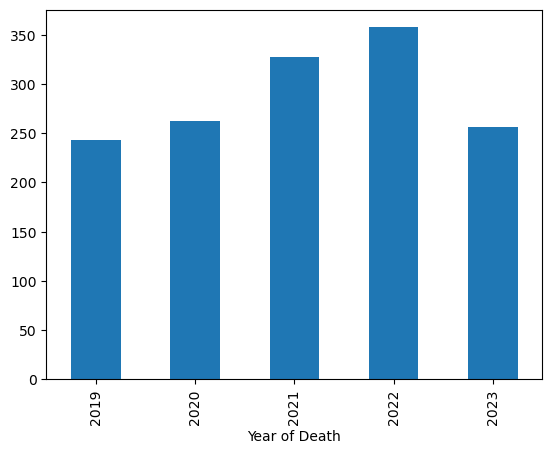

In [326]:
# Display average Maternal Deaths by Year
df.groupby('Year of Death')['Maternal Deaths'].mean().plot(kind='bar')
plt.show()


In [327]:
df1 = df.groupby('Subgroup').mean(numeric_only=True)[['Maternal Deaths']]
df1.round()

,Maternal Deaths
Subgroup,
25-39 years,627.0
40 years and over,135.0
Hispanic,160.0
Non-Hispanic American Indian or Alaska Native,18.0
Non-Hispanic Asian,32.0
Non-Hispanic Black,280.0
Non-Hispanic White,379.0
Total,885.0
Under 25 years,123.0


In [328]:
grouped_data = df.groupby('Subgroup')['Maternal Deaths'].mean()

grouped_data

In [329]:
SubgroupByAge = grouped_data.loc[['25-39 years','40 years and over','Under 25 years']]
SubgroupByAge.round()


Subgroup
25-39 years          627.0
40 years and over    135.0
Under 25 years       123.0
Name: Maternal Deaths, dtype: float64

In [330]:
SubgroupByRace = grouped_data.loc[['Hispanic','Non-Hispanic American Indian or Alaska Native','Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']]
SubgroupByRace.round()

Subgroup
Hispanic                                         160.0
Non-Hispanic American Indian or Alaska Native     18.0
Non-Hispanic Asian                                32.0
Non-Hispanic Black                               280.0
Non-Hispanic White                               379.0
Name: Maternal Deaths, dtype: float64

In [331]:
df.head()

,Data As Of,Subgroup,Year of Death,Month of Death,Month Ending Date,Maternal Deaths
0,7/2/2023,Total,2019,1,1/31/2019,660.0
1,7/2/2023,Total,2019,2,2/28/2019,653.0
2,7/2/2023,Total,2019,3,3/31/2019,657.0
3,7/2/2023,Total,2019,4,4/30/2019,668.0
4,7/2/2023,Total,2019,5,5/31/2019,706.0


### Prepare data for model training

In [332]:
# Drop non-numeric columns: region
df.drop('Subgroup',axis=1, inplace=True)
df.head()

,Data As Of,Year of Death,Month of Death,Month Ending Date,Maternal Deaths
0,7/2/2023,2019,1,1/31/2019,660.0
1,7/2/2023,2019,2,2/28/2019,653.0
2,7/2/2023,2019,3,3/31/2019,657.0
3,7/2/2023,2019,4,4/30/2019,668.0
4,7/2/2023,2019,5,5/31/2019,706.0


In [333]:
df.drop('Year of Death' ,axis=1, inplace=True)
df.head()

,Data As Of,Month of Death,Month Ending Date,Maternal Deaths
0,7/2/2023,1,1/31/2019,660.0
1,7/2/2023,2,2/28/2019,653.0
2,7/2/2023,3,3/31/2019,657.0
3,7/2/2023,4,4/30/2019,668.0
4,7/2/2023,5,5/31/2019,706.0


In [334]:
#df.drop('Month Ending Date' ,axis=1, inplace=True)
#df.head()

In [335]:
df.drop('Data As Of' ,axis=1, inplace=True)
df.head()

,Month of Death,Month Ending Date,Maternal Deaths
0,1,1/31/2019,660.0
1,2,2/28/2019,653.0
2,3,3/31/2019,657.0
3,4,4/30/2019,668.0
4,5,5/31/2019,706.0


In [336]:
#%matplotlib inline
#plt.xlabel('Year of Death')
#plt.xlabel('Maternal Deaths')
#plt.scatter(df['Year of Death'],df['Maternal Deaths'], color='red', marker='*')

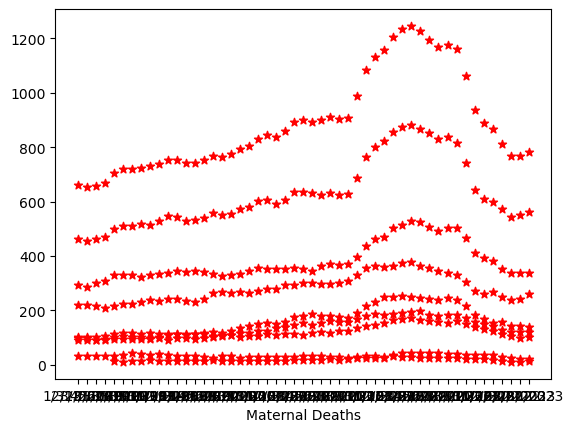

In [337]:
%matplotlib inline
plt.xlabel('Month Ending Date')
plt.xlabel('Maternal Deaths')
plt.scatter(df['Month Ending Date'],df['Maternal Deaths'], color='red', marker='*')


In [338]:
df['Month Numerical'] = pd.to_datetime(df['Month Ending Date']).map(pd.Timestamp.toordinal)
reg = linear_model.LinearRegression()
reg.fit(df[['Month Numerical']], df['Maternal Deaths'])


LinearRegression()

In [342]:
d = pd.read_csv(r"C:\Users\Ashmita\Desktop\GWC PROJECT\Predict.csv")
d.head(3)

,Month Ending Date
0,45322.0
1,45351.0
2,45382.0


In [343]:
p = reg.predict(d)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Month Ending Date
Feature names seen at fit time, yet now missing:
- Month Numerical


In [344]:
d['Maternal Deaths'] = p

In [ ]:
d

In [ ]:
# Independent variables: All columns except 'charges'
X = df.drop('Maternal Deaths', axis = 1)

# Dependent variable: charges
y = df['Maternal Deaths']

In [ ]:
type(X)

In [ ]:
X.head()

In [ ]:
y.shape

In [ ]:
type(y)

In [ ]:
y.head()

### Separate independent and dependent variables

In [ ]:
# 70% training set, 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Train Linear Regression model

In [ ]:
# Instantiate LinearRegression model
model = LinearRegression()

In [ ]:
# Fit LinearRegression model
model.fit(X_train, y_train)

In [ ]:
# Calculate model performance for training set
y_train_predict = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_predict)
rmse = np.sqrt(mse)

print("Model performance for training set")
print("----------------------------------")
print("MSE is {}".format(round(mse,2)))
print("RMSE is {}".format(round(rmse,2)))

In [ ]:
# Calculate model performance for test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model performance for test set")
print("------------------------------")
print("MSE is {}".format(round(mse,2)))
print("RMSE is {}".format(round(rmse,2)))

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
min_values = X.min()
min_values

In [ ]:
max_values = X.max()
max_values

### Execute model with new independent variable values
